In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

IMPORTING LIBARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

LOAD THE DATASET

In [3]:
# read the csv data to a pandas dataframe
df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

DATA CLEANING

In [4]:
df.shape

(800, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [12]:
# Display all columns of a dataframe
pd.set_option('display.max_columns', None)
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [11]:
# Conver age (float) -> to int
df["age"] = df["age"].astype(int)
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [13]:
# Checking unique values for each columns
for col in df.columns:
    num_cols = ["ID", "age", "result"]
    if col not in num_cols:
        print(col, df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [14]:
# Dropping ID and age_desc col
df = df.drop(columns=["ID", "age_desc"])

In [15]:
df.shape

(800, 20)

In [16]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [18]:
df.contry_of_res.unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [19]:
df.groupby("contry_of_res").sum()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,used_app_before,result,relation,Class/ASD
contry_of_res,,,,,,,,,,,,,,,,,,,
Afghanistan,11,10,13,12,8,9,8,12,12,12,645,mmmmmfmmmffmmmmmmmmmfm,OthersAsianWhite-European?South Asian?Middle E...,nonononoyesyesnonononononononoyesnoyesnoyesyes...,nononononononononononononononononononononoyes,nononoyesnononononoyesnononoyesnonononoyesnonono,204.394274,SelfSelfSelfSelfSelfSelfSelfSelfSelfSelfSelfSe...,3
AmericanSamoa,2,2,2,2,2,0,2,0,2,4,152,mmff,?White-EuropeanLatinoAsian,nonoyesno,nonoyesno,nononono,26.736042,SelfSelfSelfSelf,0
Angola,1,1,1,0,0,0,0,0,0,0,32,f,?,no,no,no,13.410777,Self,0
Argentina,1,0,0,0,0,0,0,0,0,0,47,m,White-European,no,no,no,1.629858,Self,0
Armenia,2,3,2,2,3,2,1,2,3,3,110,mmff,White-EuropeanWhite-EuropeanAsianBlack,yesnonono,nononono,nononono,34.940658,SelfParentSelf?,2
Aruba,3,3,3,3,3,3,3,4,3,3,151,mmmf,Middle Eastern White-EuropeanWhite-EuropeanBlack,noyesnoyes,noyesnono,nononono,49.305753,SelfParentSelfSelf,2
Australia,24,22,12,16,12,7,16,16,18,26,1016,fmmmmfmmmmfmmfmmmfmmmfmmmmmfmmmmmfmfm,??PasifikaOthersMiddle Eastern OthersBlackWhit...,nononononoyesnoyesnonoyesnoyesnoyesnonoyesyesn...,nonononononoyesyesnononononononononoyesnononon...,nonononononononononononononononononononononono...,282.087434,SelfSelfSelfSelfSelfSelfSelfSelfSelfSelfSelfSe...,7
Austria,4,5,4,4,3,1,3,11,4,9,477,fmmfmfmfmmmfmmfmmm,??Middle Eastern Middle Eastern White-European...,nononononononoyesnonononononononoyesyes,nononononononononononononononononono,nononoyesnoyesnonononoyesnonononononono,136.012195,SelfSelfSelf?SelfSelfSelfSelfSelfSelfSelfSelfS...,1
Azerbaijan,3,3,3,2,3,2,1,2,3,3,109,fmmm,BlackWhite-EuropeanAsianWhite-European,nononono,nononono,nononono,50.323049,SelfSelfSelfSelf,2


In [20]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa":"United States",
    "Hong Kong": "China"
}

df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [21]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [22]:
# Targe class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


EDA

In [23]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [24]:
df.describe()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis¶



In [25]:
sns.set_theme(style="darkgrid")

Mean:  27.96375
Median:  24.0


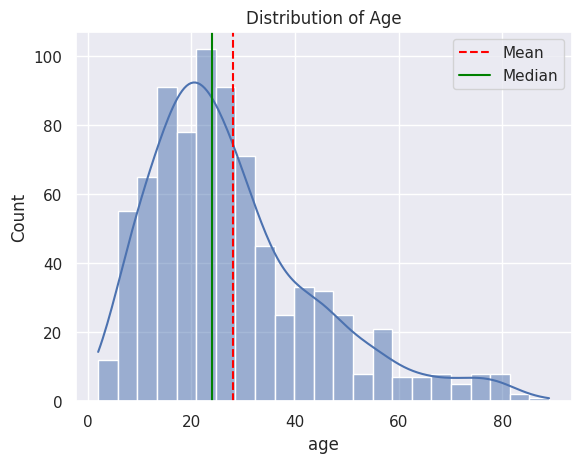

In [26]:
# Histogram of age

sns.histplot(df.age, kde=True)
plt.title("Distribution of Age")

# Calculate mean and median
age_mean = df.age.mean()
age_median = df.age.median()

print("Mean: ", age_mean)
print("Median: ", age_median)

# add vertical lines for mean and median

plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

Mean:  8.537303106501248
Median:  9.605299308


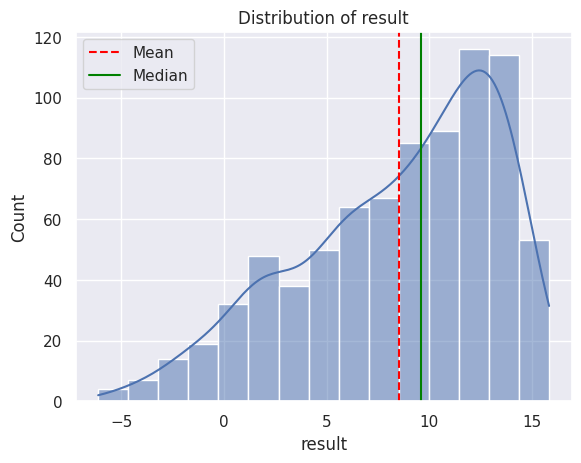

In [27]:
# Histogram for result

sns.histplot(df.result, kde=True)
plt.title("Distribution of result")

# calculate mean and median
res_mean = df.result.mean()
res_median = df.result.median()

print("Mean: ", res_mean)
print("Median: ", res_median)

plt.axvline(res_mean, color="red", linestyle="--", label="Mean")
plt.axvline(res_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

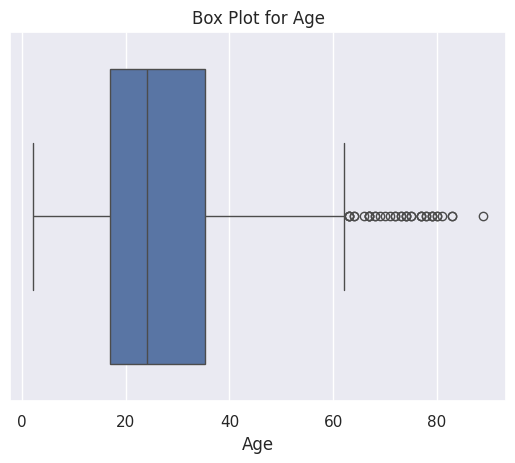

In [28]:
# Box Plot

sns.boxplot(x=df.age)
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

In [29]:
# count the outliers

Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = df[(df.age < lower_bound) | (df.age > upper_bound)]

In [30]:
len(age_outliers)

39

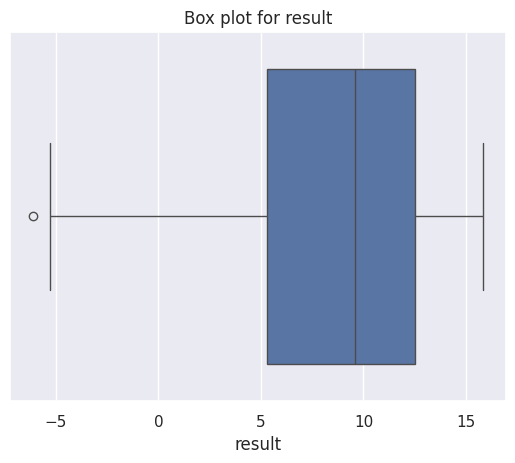

In [31]:
# Box Plot

sns.boxplot(x=df.result)
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()

In [32]:
# count the outliers

Q1 = df.result.quantile(0.25)
Q3 = df.result.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = df[(df.result < lower_bound) | (df.result > upper_bound)]
len(result_outliers)

1

UNIVARIATE ANALYSIS OF CATEOGORICAL COLUMN



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

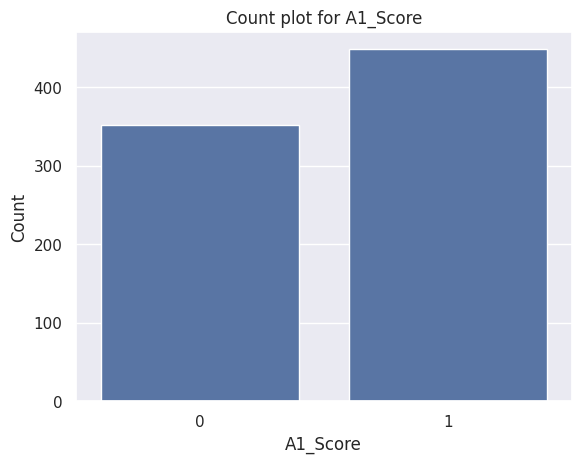

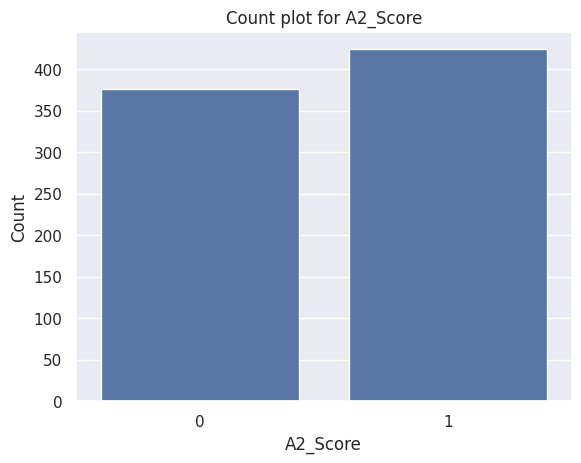

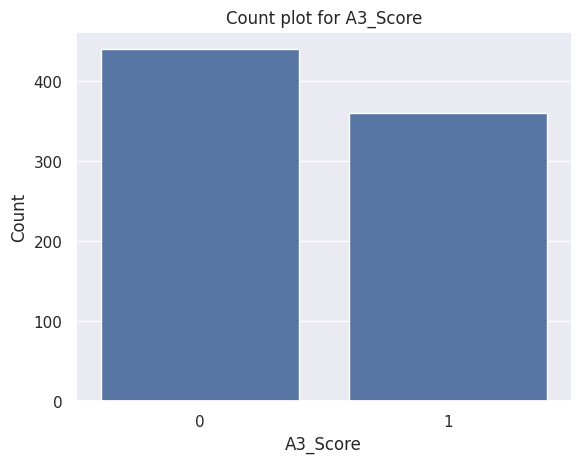

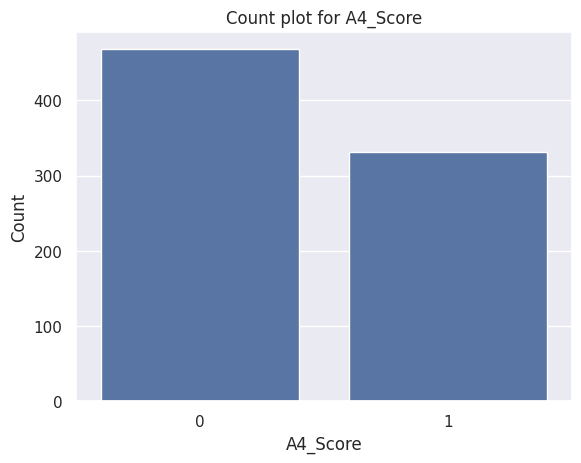

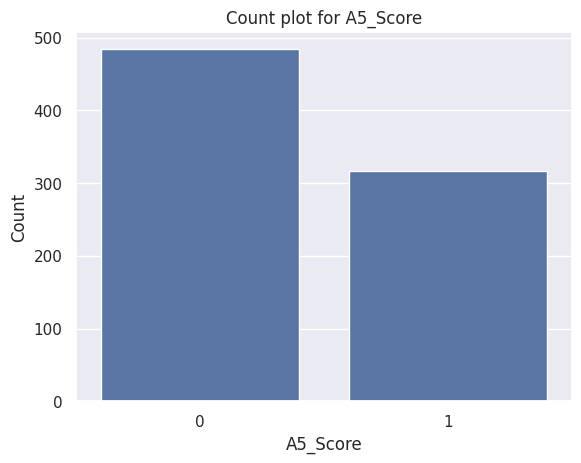

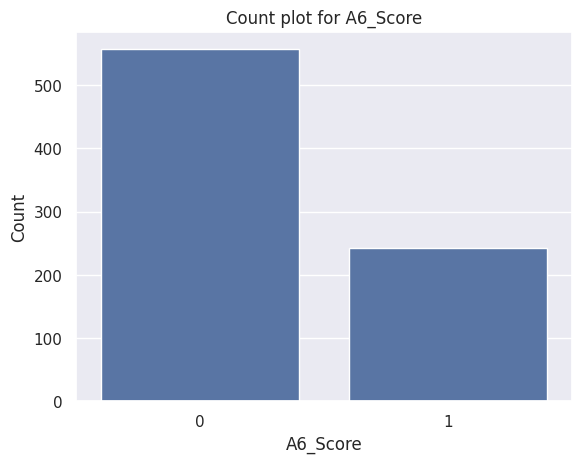

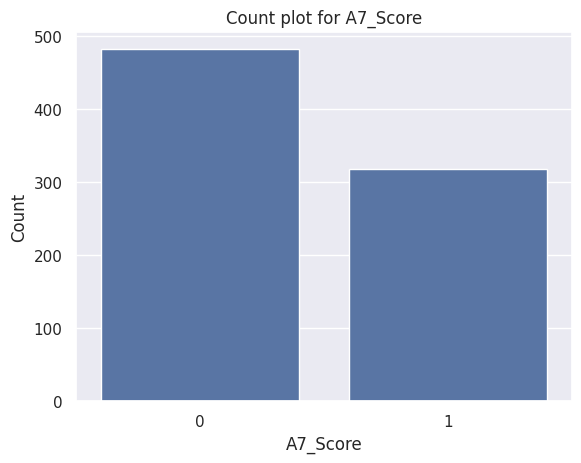

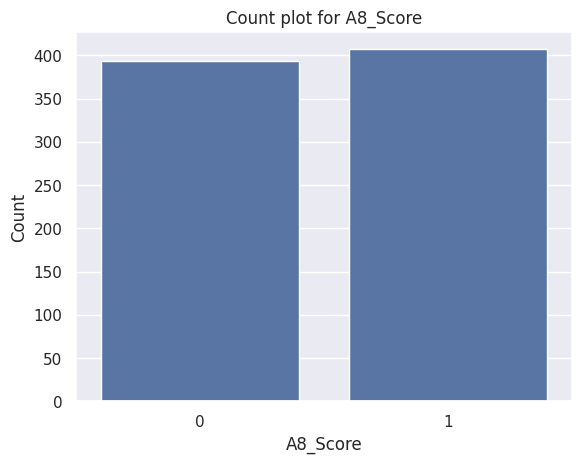

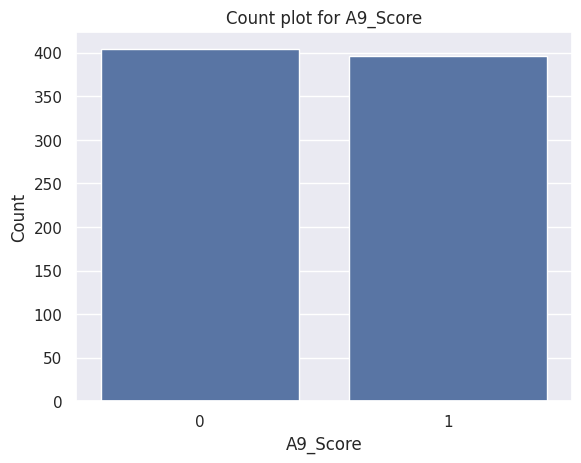

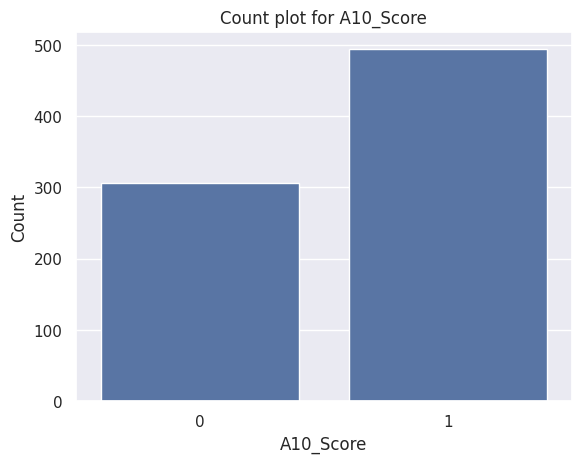

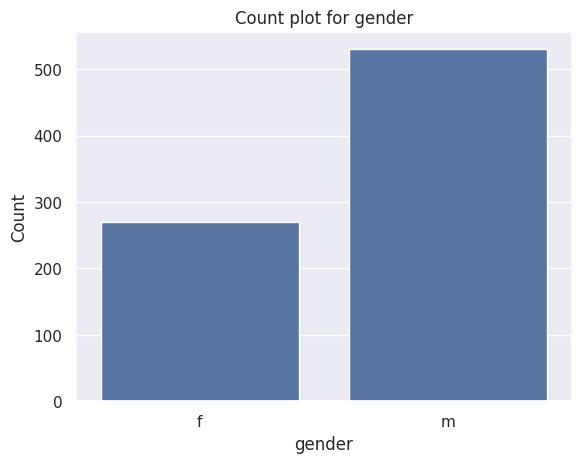

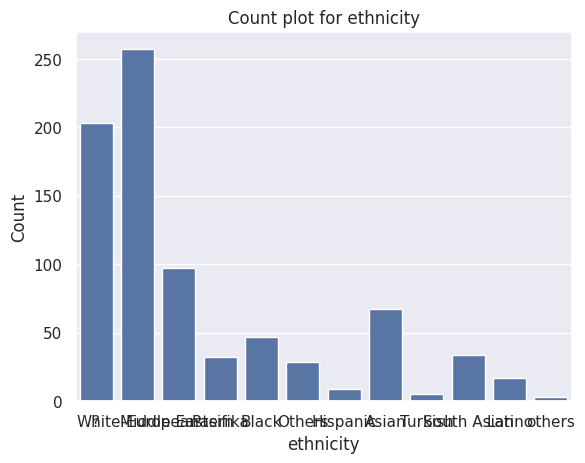

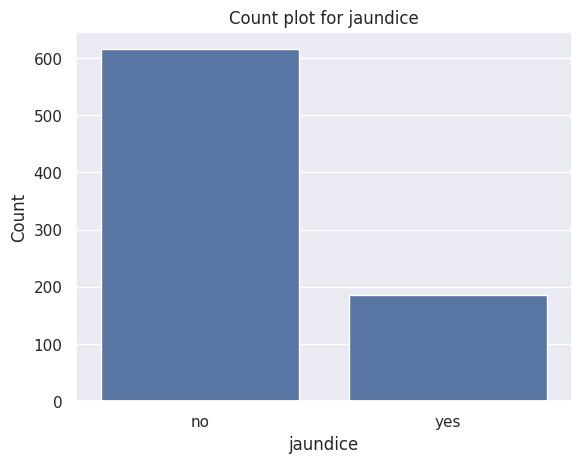

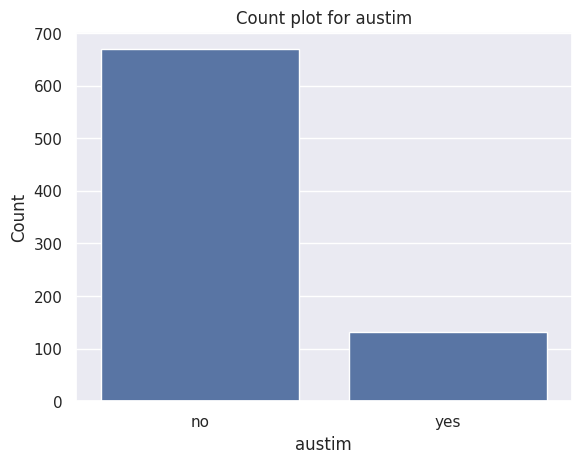

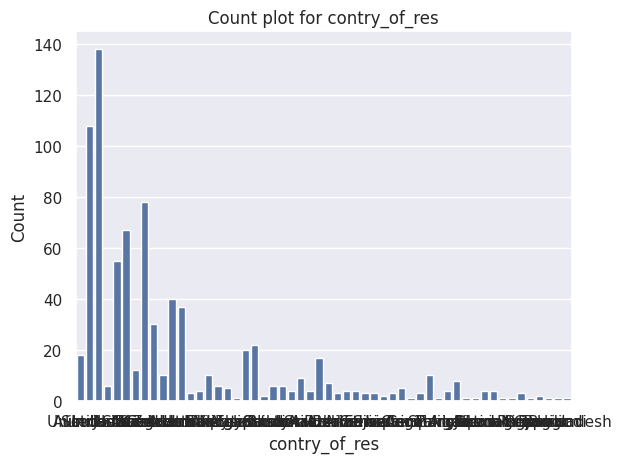

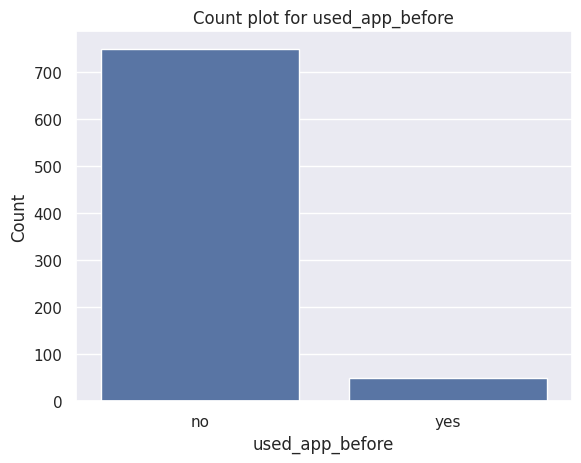

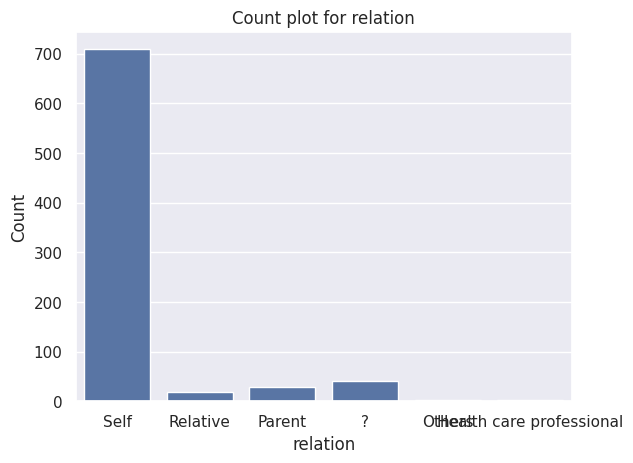

In [34]:
cat_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in cat_cols:
    sns.countplot(x=df[col])
    plt.title(f"Count plot for {col}")
    plt.xlabel(col, )
    plt.ylabel("Count")
    plt.show()

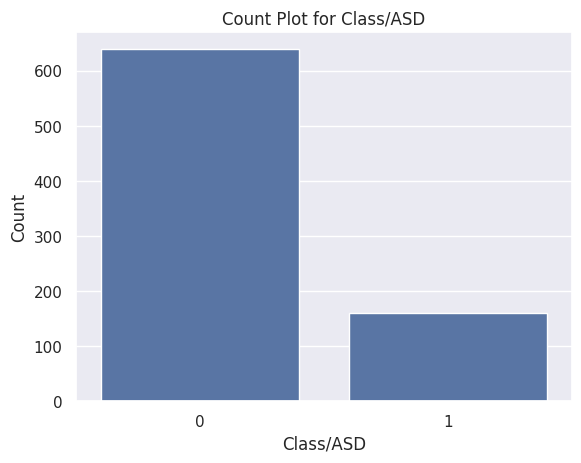

In [35]:
# count plot for target column

sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [36]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [37]:
df.ethnicity = df.ethnicity.replace({"?":"Others", "others":"Others"})
df.ethnicity.unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [38]:
df.relation.unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [39]:
df.relation = df.relation.replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [40]:
df.relation.unique()

array(['Self', 'Others'], dtype=object)

In [41]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [42]:
df.nunique()


,0
A1_Score,2
A2_Score,2
A3_Score,2
A4_Score,2
A5_Score,2
A6_Score,2
A7_Score,2
A8_Score,2
A9_Score,2
A10_Score,2


Label Encoding¶

In [43]:
object_cols = df.select_dtypes(include=["object"]).columns
object_cols

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [44]:
encoders = {}

for col in object_cols:
    label_enc = LabelEncoder()
    df[col] = label_enc.fit_transform(df[col])
    encoders[col] = label_enc

# Save the encoders as a pickle file

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders,f)
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [45]:
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


BIVARIATE ANALYSIS

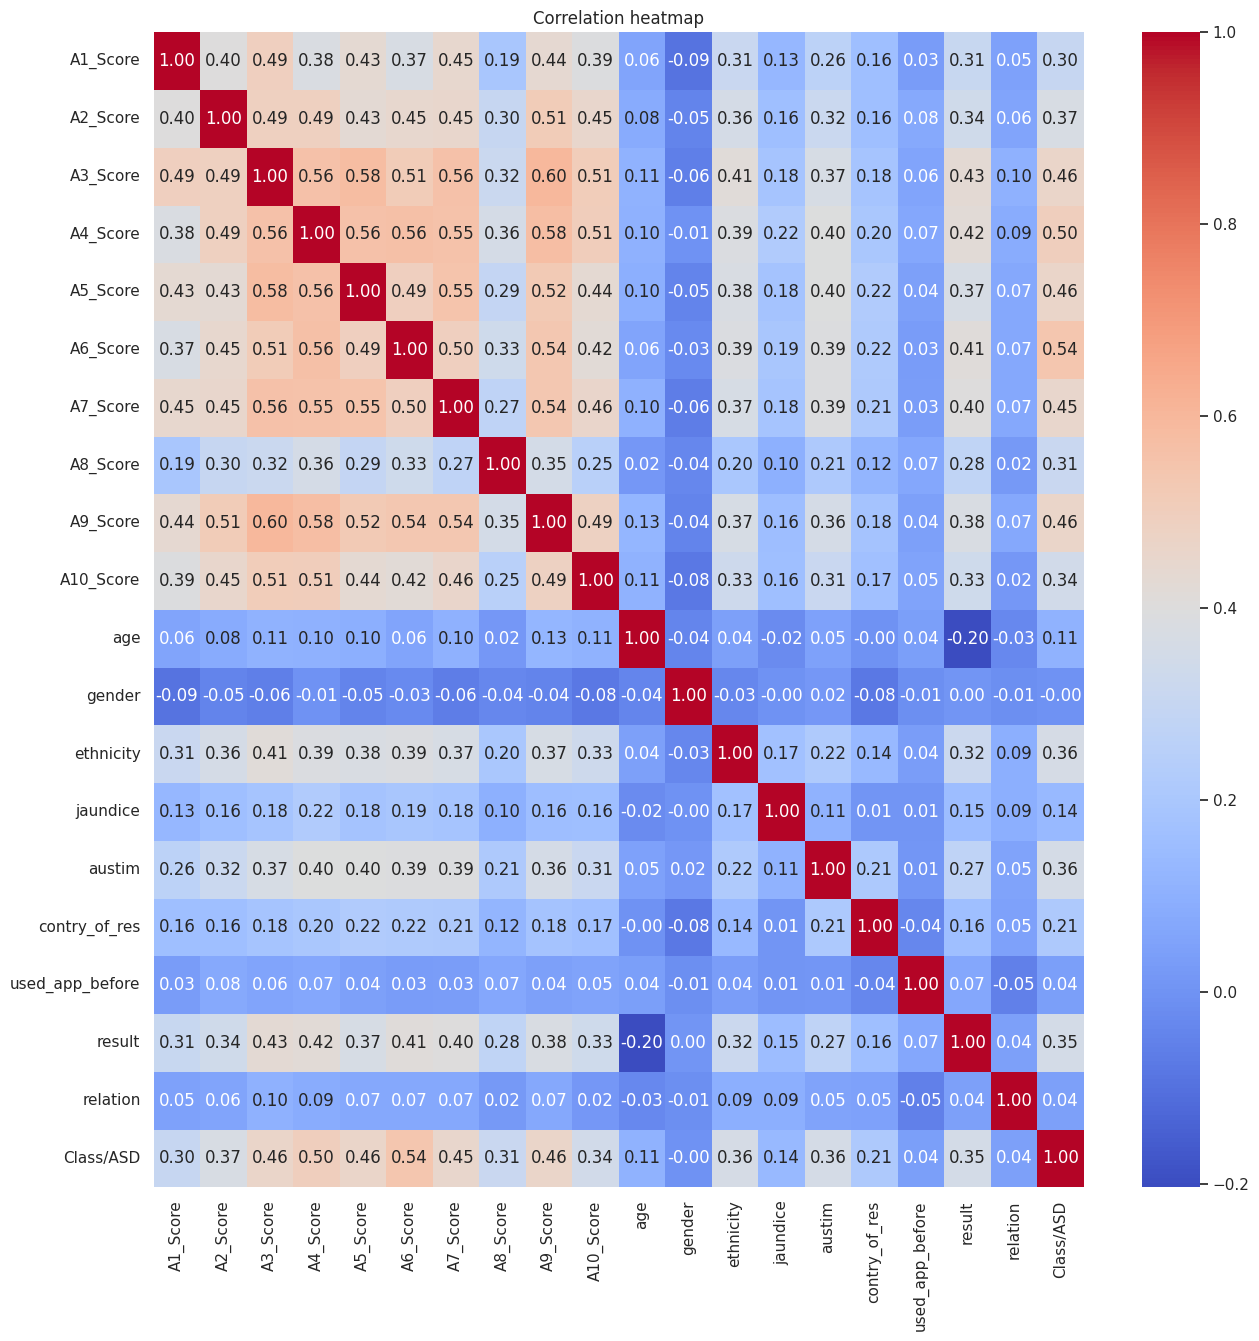

In [46]:
# Correlation Matrix

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()


DATA PREPROCESSING

In [47]:
# Function for handling outliers

def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()

    # replace outliers with median
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

In [48]:
# replace outliers in the "age" column
df = replace_outliers(df, "age")

# replace outliers in the "result" column
df = replace_outliers(df, "result")
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,25.581250,0.662500,5.577500,0.231250,0.16375,32.558750,0.062500,8.556982,0.886250,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,12.697142,0.473153,2.902503,0.421896,0.37028,16.300189,0.242213,4.779671,0.317706,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-5.264833,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,4.000000,0.000000,0.00000,23.000000,0.000000,5.311872,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,1.000000,5.000000,0.000000,0.00000,33.000000,0.000000,9.608894,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,9.000000,0.000000,0.00000,51.000000,0.000000,12.514484,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.000000,1.000000,9.000000,1.000000,1.00000,53.000000,1.000000,15.853126,1.000000,1.000000


In [49]:
X = df.drop(columns = ["Class/ASD"])
y = df["Class/ASD"]
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1


In [50]:
print(y)


0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [52]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [53]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE (Synthetic Minority Oversampling Technique)



In [55]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [56]:
print(y_train_smote.shape)
print(y_train_smote.value_counts())

(1030,)
Class/ASD
1    515
0    515
Name: count, dtype: int64


MODEL TRAINING

In [57]:
models = {
    "DT": DecisionTreeClassifier(random_state=42),
    "RF": RandomForestClassifier(random_state=42),
    "XGB": XGBClassifier(random_state=42)
}
cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default params...")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training DT with default params...
DT Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training RF with default params...
RF Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGB with default params...
XGB Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [58]:
cv_scores# Initialize the models

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [59]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf = {
    "n_estimators":[50,100,200,500],
    "max_depth":[None, 10,20,30, 50],
    "min_samples_split":[2,5,10,20],
    "min_samples_leaf":[1,2,5,10],
    "bootstrap":[True, False]
}

param_grid_xgb = {
    "n_estimators":[50,100,200,500],
    "max_depth":[3, 5,7,10],
    "learning_rate":[0.01, 0.1, 0.2, 0.3],
    "subsample":[0.5,0.7, 1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [60]:
random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)

In [61]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [62]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
Best Cross-Validation Accuracy: 0.92


In [63]:
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

MODEL EVALUATION

In [64]:
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.8375
Confusion Matrix:
 [[109  15]
 [ 11  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       124
           1       0.62      0.69      0.66        36

    accuracy                           0.84       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.84      0.84       160



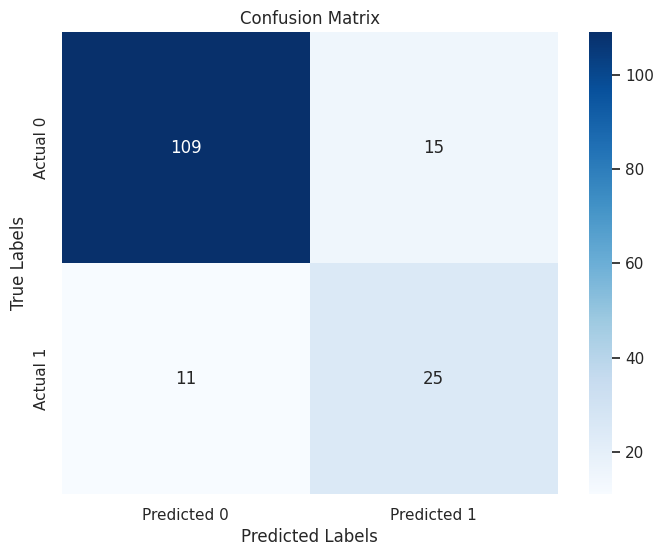

In [65]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()